In [2]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re,unicodedata

import tensorflow as tf
from langdetect import detect 


# Load Data

In [3]:
df_room = pd.read_csv("air-bnb-listings.csv", sep = ";").sample(frac = 0.3)
df_room.shape

(425265, 17)

In [4]:
df_listings = pd.read_csv("cleaned_airbnb_listings.csv")

/Users/Victor/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [206]:
df_listings = df_listings.rename(columns = {"ID" : "Room ID"})

In [205]:
len(df_room[df_room["Room ID"].isin(df_listings["ID"])]["Room ID"].unique())

53900

In [207]:
df_room_final = df_room.merge(df_listings, 
                   on=['Room ID'], how='inner').reset_index(drop=True)

In [209]:
pd.set_option('display.max_columns', 500)
df_room_final.head()

,Room ID,Name_x,Host ID_x,Neighbourhood,Room type,Room Price,Minimum nights,Number of reviews,Date last review,Number of reviews per month,Rooms rent by the host,Availibility,Updated Date,City_x,Country_x,Coordinates,Location,Listing Url,Name_y,Summary,Description,Experiences Offered,Host ID_y,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood Cleansed,City_y,State,Zipcode,Market,Smart Location,Country Code,Country_y,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,6244643,Appartement d'artiste dans le Quartier Latin,32421162,Panthéon,Entire home/apt,70,1,2,2016-07-24,0.04,1,0,2020-05-10,Paris,France,"48.8496263001,2.3512128304","France, Paris, Panthéon",https://www.airbnb.com/rooms/6244643,Appartement d'artiste dans le Quartier Latin,Appartement de 50m2 situé au plein coeur du qu...,Appartement de 50m2 situé au plein coeur du qu...,none,32421162,Youri,2015-05-02,"Paris, Île-de-France, France",NaN,NaN,Panthéon,1.0,1.0,"email,phone,facebook,reviews","Panthéon, Paris, Île-de-France 75005, France",Panthéon,Paris,Île-de-France,75005,Paris,"Paris, France",FR,France,48.849197,2.351619,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",60.0,50.0,1.0,0.0,1.0,1125.0,8 months ago,0.0,0.0,0.0,0.0,2017-04-05,2.0,2016-07-21,2016-07-24,100.0,10.0,9.0,10.0,9.0,10.0,10.0,flexible,1.0,0.23,"48.849196909,2.35161927176","Host Has Profile Pic,Is Location Exact,Instant..."
1,12839487,Cozy Double Room in Forest Lodge,38792232,Sydney,Private room,44,1,46,2019-01-03,0.95,1,0,2020-06-11,Sydney,Australia,"-33.8788148852,151.183498511","Australia, Sydney, Sydney",https://www.airbnb.com/rooms/12839487,Cozy Double Room in Forest Lodge,Our lovely 2 bedroom apartment is perfectly lo...,Our lovely 2 bedroom apartment is perfectly lo...,none,38792232,Cata,2015-07-17,"New South Wales, Australia",NaN,NaN,Glebe,1.0,1.0,"email,phone,reviews,jumio","Glebe, Forest Lodge, NSW 2037, Australia",Sydney,Forest Lodge,NSW,2037,Sydney,"Forest Lodge, Australia",AU,Australia,-33.879178,151.183065,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"TV,Pool,Kitchen,Free parking on premises,Famil...",45.0,NaN,1.0,0.0,5.0,20.0,11 months ago,0.0,0.0,0.0,0.0,2017-04-04,2.0,2016-06-24,2016-07-03,80.0,8.0,9.0,8.0,8.0,8.0,9.0,flexible,1.0,0.21,"-33.8791777682,151.183064938","Host Has Profile Pic,Host Identity Verified,Is..."
2,13078720,"Nice clean house on public transport, Dublin",9005215,Clondalkin LEA-7,Entire home/apt,107,3,46,01-01-12,NaN,1,164,NaN,Visualisations,Ireland,"53.3246385026,-6.37689261113","Ireland, Visualisations, Clondalkin LEA-7",https://www.airbnb.com/rooms/13078720,Nice clean house on public transport,"No. 13 bus stop is outside 20 metres away, pub...","No. 13 bus stop is outside 20 metres away, pub...",none,9005215,Kevin,2013-09-23,"Dublin, Dublin, Ireland",within an hour,100.0,Clondalkin,1.0,1.0,"email,phone,facebook,reviews,jumio,government_id","Woodford Grove, Clondalkin, County Dublin D22 ...",South Dublin,Clondalkin,County Dublin,D22 HX94,Dublin,"Clondalkin, Ireland",IE,Ireland,53.324740,-6.377850,House,Entire home/apt,5.0,1.0,3.0,4.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",107.0,30.0,1.0,0.0,3.0,14.0,a week ago,19.0,40.0,70.0,178.0,2017-02-18,5.0,2016-07-07,2016-12-11,88.0,10.0,8.0,10.0,10.0,8.0,9.0,moderate,1.0,0.66,"53.3247395324,-6.37

In [210]:
for i in df_room_final.columns:
    print(i, round(df_room_final[i].isna().sum()/len(df_room_final),2))

Room ID 0.0
Name_x 0.0
Host ID_x 0.0
Neighbourhood 0.0
Room type 0.0
Room Price 0.0
Minimum nights 0.0
Number of reviews 0.0
Date last review 0.15
Number of reviews per month 0.16
Rooms rent by the host 0.0
Availibility 0.0
Updated Date 0.01
City_x 0.0
Country_x 0.0
Coordinates 0.0
Location 0.0
Listing Url 0.0
Name_y 0.0
Summary 0.04
Description 0.0
Experiences Offered 0.0
Host ID_y 0.0
Host Name 0.0
Host Since 0.0
Host Location 0.0
Host Response Time 0.3
Host Response Rate 0.3
Host Neighbourhood 0.23
Host Listings Count 0.0
Host Total Listings Count 0.0
Host Verifications 0.0
Street 0.0
Neighbourhood Cleansed 0.0
City_y 0.0
State 0.13
Zipcode 0.05
Market 0.01
Smart Location 0.0
Country Code 0.0
Country_y 0.0
Latitude 0.0
Longitude 0.0
Property Type 0.0
Room Type 0.0
Accommodates 0.0
Bathrooms 0.0
Bedrooms 0.0
Beds 0.0
Bed Type 0.0
Amenities 0.01
Price 0.02
Cleaning Fee 0.37
Guests Included 0.0
Extra People 0.0
Minimum Nights 0.0
Maximum Nights 0.0
Calendar Updated 0.0
Availability 30 

In [211]:
df_room_final.to_csv("airbnb_rooms_final.csv", index = False)

# Building dataset to model

In [212]:
df_room_final["Review Scores Rating"].isna().sum()/len(df_room_final)

0.23848954771454448

In [214]:
mis = df_room_final[df_room_final["Number of reviews per month"].isna()]["Room ID"]

In [215]:
mis

2        13078720
8        10710807
17        9197168
23       11292748
24       15539975
           ...   
54082    13265706
54085    10022418
54088    13925014
54096    14839700
54097     6868488
Name: Room ID, Length: 8558, dtype: object

In [217]:
df_room = df_room_final[df_room_final["Room ID"].isin(mis) == False].copy()

In [218]:
df_room.shape

(45368, 78)

In [219]:
df_reviews = pd.read_csv("airbnb-reviews.csv", sep = ";").sample(frac = 0.1)


In [220]:
df_reviews.shape

(834817, 6)

In [221]:
df_reviews = df_reviews[df_reviews["listing_id"].isin(mis) == False].copy()

In [222]:
df_reviews.shape

(833393, 6)

In [223]:
df_reviews[["listing_id", "comments"]].groupby("listing_id").count().sort_values(["comments"], ascending = 0).head(30000)

,comments
listing_id,
8357,72
1260528,68
820227,60
900456,58
82482,58
...,...
1999959,7
690832,7
13036390,7


In [224]:
t = df_reviews[["listing_id", 
                "comments"]].groupby("listing_id").count().sort_values(["comments"], ascending = 0)

In [225]:
t["comments"] = t["comments"].astype(int)

In [229]:
sample = t[(t["comments"]>=10)].index
len(sample)

19187

In [230]:
len(t.index.unique())

218336

In [262]:
df_rev = df_reviews[df_reviews["listing_id"].isin(t.index.unique())].copy()

In [263]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
4959095,8670481,56959676,2015-12-20,4079048,Maya,"wonderful place, all in very good taste. fully..."
989343,6397224,39860096,2015-07-26,29151808,Cathy,very cozy with perfect location! highly recommend
5327503,1580139,38754084,2015-07-18,7479473,Pierre,Miguel ist sehr nett. Seine Eltern haben uns d...
6364891,255338,79888229,2016-06-14,6633483,Carl,Great apartment for group of friends. Good loc...
2496308,7927226,71338733,2016-04-24,52000359,Pui Yin,Hugo is a very good host that he allows us to ...


In [269]:
df_rev = df_reviews[df_reviews["listing_id"].isin(sample)].sample(frac = 0.3)
df_rev.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [270]:
df_rev = df_rev.rename(columns = {"listing_id" : "Room ID"})

In [271]:
df_final = df_rev[["Room ID", "comments"]].merge(df_room[["Room ID", "Number of reviews per month",'Room Price', 
                                                          'Minimum nights', 'Number of reviews', 
                                                          "Review Scores Rating", "Room Price"]], 
                   on=['Room ID'], how='inner').reset_index(drop=True)


In [272]:
#df_final = df_rev[["Room ID", "comments"]].merge(df_room[["Room ID", "Number of reviews per month", "City"]], 
#                   on=['Room ID'], how='inner').reset_index(drop=True)


In [273]:
df_final.shape

(12167, 8)

In [274]:
df_final.head()

,Room ID,comments,Number of reviews per month,Room Price,Minimum nights,Number of reviews,Review Scores Rating,Room Price
0,3840321,Lovely welcoming couple with a fantastically s...,5.19,79,4,367,97.0,79
1,3840321,Thanks for your lovely apartment ! Harald & Ed...,5.19,79,4,367,97.0,79
2,3840321,os anfitriões foram muito gentis e hospitaleir...,5.19,79,4,367,97.0,79
3,3840321,Our stay with Harald and Edith was perfect! Th...,5.19,79,4,367,97.0,79
4,1935524,Emil was a terrific host. He responded prompt...,2.57,68,3,199,95.0,68


In [277]:
df_final["Review Scores Rating"].isna().sum()

0

In [278]:
def lang(txt):
    try:
        return detect(txt)
    except:
        return "not found"

df_final['language'] = df_final['comments'].apply(lambda x: lang(x))

In [279]:
df_final.head()

,Room ID,comments,Number of reviews per month,Room Price,Minimum nights,Number of reviews,Review Scores Rating,Room Price,language
0,3840321,Lovely welcoming couple with a fantastically s...,5.19,79,4,367,97.0,79,en
1,3840321,Thanks for your lovely apartment ! Harald & Ed...,5.19,79,4,367,97.0,79,en
2,3840321,os anfitriões foram muito gentis e hospitaleir...,5.19,79,4,367,97.0,79,pt
3,3840321,Our stay with Harald and Edith was perfect! Th...,5.19,79,4,367,97.0,79,en
4,1935524,Emil was a terrific host. He responded prompt...,2.57,68,3,199,95.0,68,en


# Filtering reviews only in English

In [281]:
df_final[df_final["language"] == "en"]["language"].value_counts()

en    10069
Name: language, dtype: int64

In [282]:
df_final = df_final[df_final["language"] == "en"].copy()

In [283]:
df_final.head()

,Room ID,comments,Number of reviews per month,Room Price,Minimum nights,Number of reviews,Review Scores Rating,Room Price,language
0,3840321,Lovely welcoming couple with a fantastically s...,5.19,79,4,367,97.0,79,en
1,3840321,Thanks for your lovely apartment ! Harald & Ed...,5.19,79,4,367,97.0,79,en
3,3840321,Our stay with Harald and Edith was perfect! Th...,5.19,79,4,367,97.0,79,en
4,1935524,Emil was a terrific host. He responded prompt...,2.57,68,3,199,95.0,68,en
5,1935524,"The neighborhood was perfect, it had very easy...",2.57,68,3,199,95.0,68,en


In [284]:
def limpiar_texto(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res


df_final["comments"] = df_final["comments"].map(limpiar_texto)
df_final["comments"]

0        lovely welcoming couple with a fantastically s...
1        thanks for your lovely apartment harald edith ...
3        our stay with harald and edith was perfect the...
4        emil was a terrific host he responded promptly...
5        the neighborhood was perfect it had very easy ...
                               ...                        
12160    dealing with celeste was very relaxing early c...
12161    shane s room was great felt like a mini apartm...
12162    khem s place was perfect it s a little while t...
12165    kyle is very helpful and responsive it is comf...
12166    great airbnb experience communication with tra...
Name: comments, Length: 10069, dtype: object

In [285]:
sw = [limpiar_texto(w) for w in sw]

## Tokenizar texto

In [286]:
from nltk.corpus import stopwords

sw = stopwords.words('english')
sw = [limpiar_texto(w) for w in sw]
df_final["comments"] = df_final["comments"].map(lambda x:" ".join([v for v in x.split(' ') if v not in sw]))
df_final.head()

,Room ID,comments,Number of reviews per month,Room Price,Minimum nights,Number of reviews,Review Scores Rating,Room Price,language
0,3840321,lovely welcoming couple fantastically situated...,5.19,79,4,367,97.0,79,en
1,3840321,thanks lovely apartment harald edith welcoming...,5.19,79,4,367,97.0,79,en
3,3840321,stay harald edith perfect friendly hospitable ...,5.19,79,4,367,97.0,79,en
4,1935524,emil terrific host responded promptly whenever...,2.57,68,3,199,95.0,68,en
5,1935524,neighborhood perfect easy access metro walking...,2.57,68,3,199,95.0,68,en


In [287]:
tk = tf.keras.preprocessing.text.Tokenizer(num_words=500, lower=True,split=' ')

In [288]:
tk.fit_on_texts(df_final["comments"].values)

In [289]:
tam_vocab = len(tk.word_index)
print(tam_vocab)

14539


In [290]:
X = tk.texts_to_sequences(df_final["comments"].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [291]:
print(df_final["comments"].values[-1])
print(X[-1])
print(df_final["comments"].values[11])
print(X[11])

great airbnb experience communication travis easy quickly answered many questions listing accurate apartment clean great location near many dc finest attractions felt extremely safe times even walking late evening view capitol building night front yard awesome would definitely choose location visiting dc
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   1  91  42 153  20 312 102 134 284 411   3   7   1
   6 119 102 232  82 127 135 301  31  52 152 379 174 220  64 399 165   9
  26   6 247]
apartment great locatio

In [292]:
df_final["Review Scores Rating"].describe()

count    10069.000000
mean        94.448307
std          3.814771
min         73.000000
25%         92.000000
50%         95.000000
75%         97.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

In [142]:
df_final[["City","Number of reviews per month"]].groupby("City").mean()

,Number of reviews per month
City,
Amsterdam,1.203382
Antwerp,1.450000
Asheville,1.210000
Athens,3.231356
Austin,3.917766
Barcelona,3.045238
Berlin,2.303364
Boston,3.433000
Brussels,3.969524


In [408]:
y = np.array((df_final["Review Scores Rating"]>=90).astype(int)) #Positivo para puntuaciones 4 y 5

In [409]:
y.mean()

0.8928394080842189

# Modelación con Tensorflow

In [300]:
from sklearn.model_selection import train_test_split

Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)
Xt.shape,Xv.shape

((7048, 165), (3021, 165))

In [301]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [302]:
tam_vector_embed = 24
model = Sequential()
model.add(Embedding(tam_vocab, tam_vector_embed,     
                                     input_length=Xt.shape[1]) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 165, 24)           348936    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 165, 24)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               50000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 399,037
Trainable params: 399,037
Non-trainable params: 0
_________________________________________________________________
None


In [303]:
historia = model.fit(X,y,
                  validation_split=0.3, epochs=8, batch_size=25,shuffle=True)

Epoch 1/8
282/282 [==============================] - 102s 361ms/step - loss: 0.3603 - accuracy: 0.8898 - val_loss: 0.3327 - val_accuracy: 0.8957
Epoch 2/8
282/282 [==============================] - 111s 394ms/step - loss: 0.3348 - accuracy: 0.8916 - val_loss: 0.3262 - val_accuracy: 0.8957
Epoch 3/8
282/282 [==============================] - 103s 367ms/step - loss: 0.3133 - accuracy: 0.8922 - val_loss: 0.3283 - val_accuracy: 0.8941
Epoch 4/8
282/282 [==============================] - 122s 433ms/step - loss: 0.3018 - accuracy: 0.8937 - val_loss: 0.3273 - val_accuracy: 0.8937
Epoch 5/8
282/282 [==============================] - 115s 407ms/step - loss: 0.2999 - accuracy: 0.8929 - val_loss: 0.3324 - val_accuracy: 0.8928
Epoch 6/8
282/282 [==============================] - 113s 401ms/step - loss: 0.2921 - accuracy: 0.8959 - val_loss: 0.3308 - val_accuracy: 0.8944
Epoch 7/8
282/282 [==============================] - 103s 365ms/step - loss: 0.2873 - accuracy: 0.8953 - val_loss: 0.3373 - val_ac

# Métricas

In [304]:
import matplotlib.pyplot as plt

hist = historia.history
x_arr = np.arange(len(hist['loss']))+1

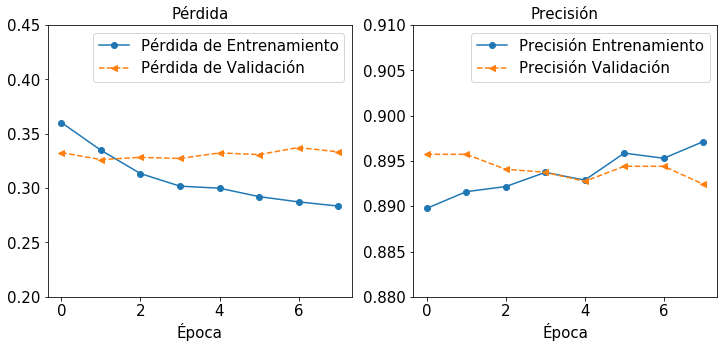

In [320]:

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(hist['loss'],'-o',label='Pérdida de Entrenamiento')
ax.plot(hist['val_loss'],'--<',label='Pérdida de Validación')
ax.set_title('Pérdida',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax.legend(fontsize=15)
ax.set_ylim(ymin = 0.2, ymax = 0.45)
ax = fig.add_subplot(1,2,2)
ax.plot(hist['accuracy'],'-o',label='Precisión Entrenamiento')
ax.plot(hist['val_accuracy'],'--<',label='Precisión Validación')
ax.set_title('Precisión',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax.legend(fontsize=15)
ax.set_ylim(ymin = 0.88, ymax = 0.91)

plt.show()

In [321]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [322]:
yt_pred = model.predict(Xt)
yt_pred = np.array([int(x[0]>=0.5) for x in yt_pred])
yv_pred = model.predict(Xv)
yv_pred = np.array([int(x[0]>=0.5) for x in yv_pred])

In [323]:
yt_score =np.array([x[0] for x in model.predict(Xt)])
yv_score =np.array([x[0] for x in model.predict(Xv)])

In [331]:
accuracy_score(y_true=yt,y_pred=yt_pred),accuracy_score(y_true=yv,y_pred=yv_pred)

(0.89472190692395, 0.9003641178417743)

In [332]:
roc_auc_score(y_true=yt,y_score=yt_score),roc_auc_score(y_true=yv,y_score=yv_score)

(0.7735005445756211, 0.7667182746312344)

In [333]:
confusion_matrix(y_true=yt,y_pred=yt_pred),confusion_matrix(y_true=yv,y_pred=yv_pred)

(array([[  55,  710],
        [  32, 6251]]), array([[  35,  279],
        [  22, 2685]]))

In [334]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [347]:
textos = pd.DataFrame(tk.sequences_to_texts(X), columns = ["message"])
textos ["y"] = y

# Vectorización de Textos

In [402]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def vectoriza (df):
    vec = CountVectorizer(analyzer="word", ngram_range=(1, 3), min_df=10,max_features=200)
    x = vec.fit_transform(df["message"])
    words = pd.DataFrame(columns=vec.get_feature_names(), data=x.toarray())
    df = df.merge(words, left_index=True, right_index=True)
    return df

In [403]:
text = vectoriza(textos)

In [404]:
text.head()

,message,y,10,able,absolutely,access,accommodating,airbnb,airport,also,always,amazing,anyone,apartment,apartment clean,area,around,arrival,arrived,available,away,awesome,back,bars,bathroom,beautiful,bed,best,better,big,bit,breakfast,bus,center,central,check,city,clean,clean comfortable,close,coffee,come,come back,comfortable,communication,convenient,could,cozy,day,days,definitely,definitely recommend,definitely stay,described,distance,downtown,easy,enjoyed,enjoyed stay,enough,equipped,etc,even,every,everything,everything needed,exactly,excellent,experience,extremely,family,fantastic,feel,felt,find,first,flat,food,friendly,gave,gave us,get,go,good,got,great,great host,great location,great place,help,helpful,highly,highly recommend,home,host,hosts,house,information,kind,kitchen,late,left,like,little,local,located,location,london,looking,lot,lots,love,loved,lovely,made,make,many,meet,met,metro,minute,minutes,morning,much,near,nearby,need,needed,neighborhood,neighbourhood,new,next,nice,night,nights,one,overall,parking,people,perfect,pictures,place,place stay,places,plenty,private,provided,questions,quick,quiet,quite,really,recommend,recommend place,recommended,restaurants,right,rome,room,safe,see,shops,short,shower,small,space,spacious,station,stay,stayed,staying,street,super,sure,thank,thanks,things,time,train,trip,two,us,use,venice,view,visit,walk,walking,walking distance,want,warm,water,way,welcome,welcoming,well,within,wonderful,would,would definitely,would definitely stay,would recommend
0,lovely welcoming couple situated apartment gre...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,thanks lovely apartment welcoming flat need to...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,stay perfect friendly gave us lot useful tips ...,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,host needed ask made feel welcome apartment id...,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,neighborhood perfect easy access metro walking...,1,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0


# Word Clouds

In [445]:
stopwords = ("apartment", "house", "also", "us","even", "really", "nice", "place","stay", "great",
            "host", "room", "area", "home", "comfortable", "lot", "one", "location", "time", "perfect",
            "good", "thank",
             "clean","lovely", "flat","amazing", "everything","wonderful", "helpful","need", "beautiful",
             "close", "would", "well", "could","bed", "definitely","day", "thanks")

In [446]:
from wordcloud import WordCloud

def nube(df):
    for i in df["y"].unique():
        comment_words = " ".join(df[df["y"] == i]["message"].str.lower())
        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 
        print(i)
        plt.figure(figsize = (10, 10), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        #plt.savefig("Nubes de palabras/" + t + "/" + i + ".png")

        plt.show()

1


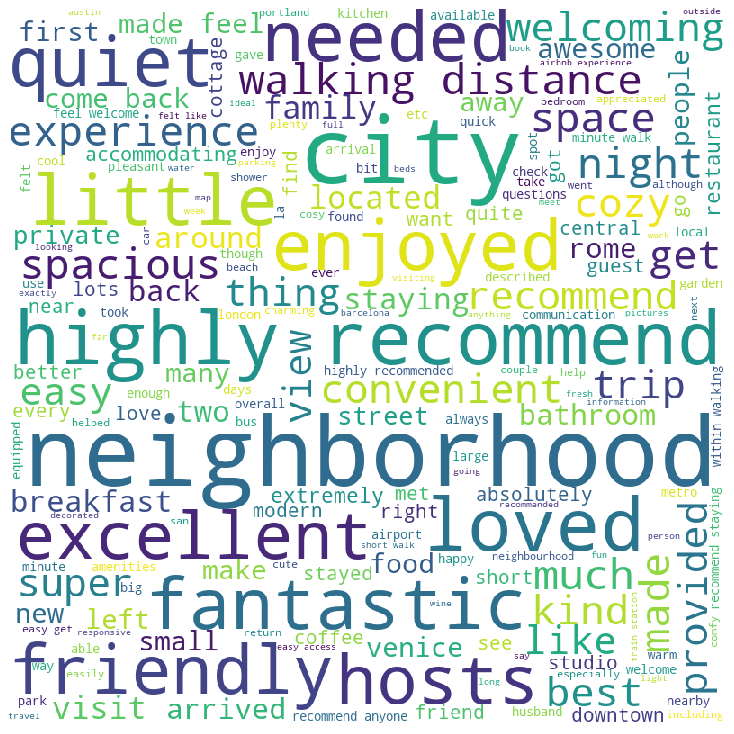

0


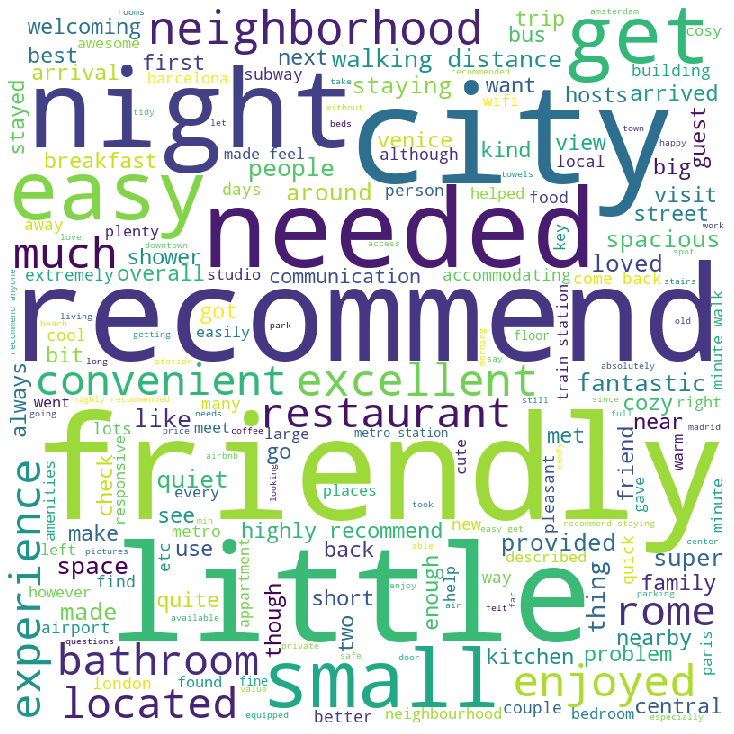

In [447]:
nube(text)

In [401]:
tk.sequences_to_texts(X)[10066]

'place perfect little get 30 min however appreciated easy going neighbourhood big restaurant around block would always us nice food especially enjoyed sweet new apartment house clean convenient 4 people one looking'